In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np
import math

In [2]:
%matplotlib inline

import sys, os


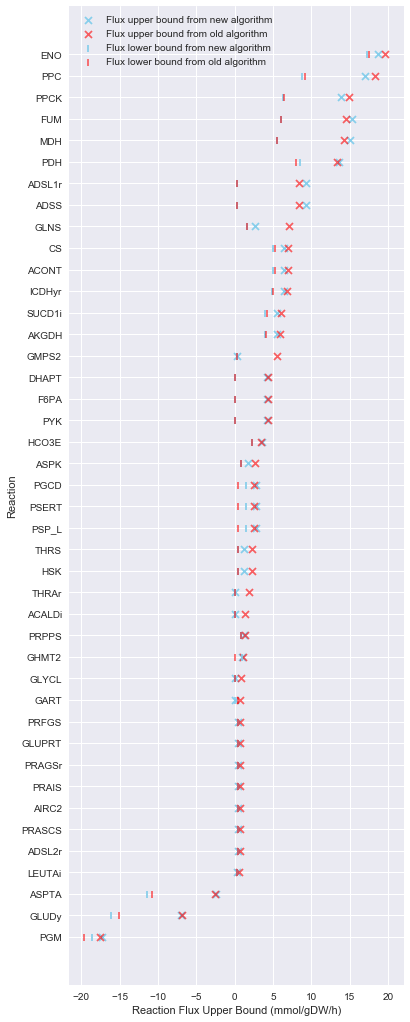

In [5]:
# Load the dataframe
df0 = pd.read_csv('test_data/oldLF2C-vs-newLF2C-hi-bound-v2.csv', sep=',', names= ['reaction','newhi', 'oldhi'],skiprows=0)
df0['diffhi'] = (abs(df0['oldhi'] - df0['newhi']))

df00 = pd.read_csv('test_data/oldLF2C-vs-newLF2C-lo-bound-v2.csv', sep=',', names= ['reaction','newlo', 'oldlo'],skiprows=0)
df0['difflo'] = (abs(df00['oldlo'] - df00['newlo']))
df0['oldlo'] = (df00['oldlo'])
df0['newlo'] = (df00['newlo'])

#difference threshold delta, in mmol/gDW/hr
delta=.1

#threshold for limit cycles removal
limit_cycle = 400

df =  df0[(df0['diffhi'] > delta) & (df0['newhi'] < limit_cycle) & (df0['newhi'] > -limit_cycle) & (df0['oldhi'] < limit_cycle) & (df0['oldhi'] > -limit_cycle)]

# Initialize BIG figure
fig = plt.figure(1, [6, 18])   

# Reorder it following the values of the first value:
ordered_df = df.sort_values(by='oldhi')
my_range=range(1,len(df.index)+1)
    
# Initialize BIG figure
fig = plt.figure(1, [6.7, 8])    
ax = fig.add_subplot(111)

# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns
#plt.hlines(y=my_range, xmin=ordered_df['new'], xmax=(ordered_df['old']), color='grey', alpha=0.4)
plt.scatter(ordered_df['newhi'], my_range, color='skyblue', alpha=1, label='Flux upper bound from new algorithm',marker='x')
plt.scatter((ordered_df['oldhi']), my_range, color='red', alpha=0.6 , label='Flux upper bound from old algorithm',marker='x')
plt.scatter(ordered_df['newlo'], my_range, color='skyblue', alpha=1, label='Flux lower bound from new algorithm',marker='|')
plt.scatter((ordered_df['oldlo']), my_range, color='red', alpha=0.6 , label='Flux lower bound from old algorithm',marker='|')

plt.legend()
plt.yticks(my_range, ordered_df['reaction'])
plt.xlabel('Reaction Flux Upper Bound (mmol/gDW/h)')
plt.ylabel('Reaction')
#plt.show()
plt.savefig("old-new-all-bounds.pdf", bbox_inches='tight')

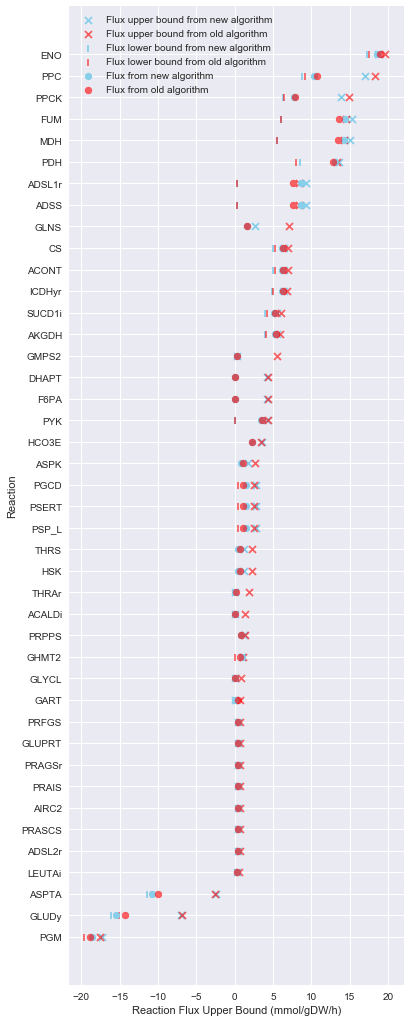

In [4]:
# Load the dataframe
df0 = pd.read_csv('test_data/oldLF2C-vs-newLF2C-hi-bound-v2.csv', sep=',', names= ['reaction','newhi', 'oldhi'],skiprows=0)
df0['diffhi'] = (abs(df0['oldhi'] - df0['newhi']))

df00 = pd.read_csv('test_data/oldLF2C-vs-newLF2C-lo-bound-v2.csv', sep=',', names= ['reaction','newlo', 'oldlo'],skiprows=0)
df0['difflo'] = (abs(df00['oldlo'] - df00['newlo']))
df0['oldlo'] = (df00['oldlo'])
df0['newlo'] = (df00['newlo'])

df000 = pd.read_csv('test_data/oldLF2C-vs-newLF2C-fluxes.csv', sep=',', names= ['reaction','old', 'new'],skiprows=0)
df0['old'] = (df000['old'])
df0['new'] = (df000['new'])


#difference threshold delta, in mmol/gDW/hr
delta=.1

#threshold for limit cycles removal
limit_cycle = 400

df =  df0[(df0['diffhi'] > delta) & (df0['newhi'] < limit_cycle) & (df0['newhi'] > -limit_cycle) & (df0['oldhi'] < limit_cycle) & (df0['oldhi'] > -limit_cycle)]

# Initialize BIG figure
fig = plt.figure(1, [6, 18])   

# Reorder it following the values of the first value:
ordered_df = df.sort_values(by='oldhi')
my_range=range(1,len(df.index)+1)
    
# Initialize BIG figure
fig = plt.figure(1, [6.7, 8])    
ax = fig.add_subplot(111)

# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns
#plt.hlines(y=my_range, xmin=ordered_df['new'], xmax=(ordered_df['old']), color='grey', alpha=0.4)
plt.scatter(ordered_df['newhi'], my_range, color='skyblue', alpha=1, label='Flux upper bound from new algorithm',marker='x')
plt.scatter((ordered_df['oldhi']), my_range, color='red', alpha=0.6 , label='Flux upper bound from old algorithm',marker='x')
plt.scatter(ordered_df['newlo'], my_range, color='skyblue', alpha=1, label='Flux lower bound from new algorithm',marker='|')
plt.scatter((ordered_df['oldlo']), my_range, color='red', alpha=0.6 , label='Flux lower bound from old algorithm',marker='|')
plt.scatter(ordered_df['new'], my_range, color='skyblue', alpha=1, label='Flux from new algorithm',marker='o')
plt.scatter((ordered_df['old']), my_range, color='red', alpha=0.6 , label='Flux from old algorithm',marker='o')

plt.legend()
plt.yticks(my_range, ordered_df['reaction'])
plt.xlabel('Reaction Flux Upper Bound (mmol/gDW/h)')
plt.ylabel('Reaction')
#plt.show()
plt.savefig("old-new-all-bounds-with-fluxes.pdf", bbox_inches='tight')